In [ ]:
# Rename and extract the files needed ( eg: all T2W files from Visits 1 and 2)

import os
import nibabel as nb
'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        
def main():
    
    dirName = '/Users/bthomas/Downloads/temp_for_Belvin/travastin_belvin'
    # Get the list of all files in directory tree at given path
    listOfFiles = getListOfFiles(dirName)
    numfiles=0
    numextracted =0
    # Print the files
    for elem in listOfFiles:
        if elem.endswith("T2W.nii.gz"):
            print('Reading', elem)
            patientnum = elem[58:62]
            visitnum = int(elem[71])
#             if visitnum ==1 or visitnum ==2:
            newelem = f"{dirName}/../Files_extracted/{patientnum}_v{str(visitnum)}_T2W.nii.gz"
            os.rename(elem,newelem)
            numextracted+=1
#             else:
#                 print("File not from visit 1 or 2 !")
            numfiles+=1
            print('Copying.....')
    print(numextracted, 'files extracted')   
        
if __name__ == '__main__':
    main()

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_34852/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [63]:
# Just KeepLargestConnectedComponentOnly
# Post process the Final outputs 

import os
import nibabel as nb
import SimpleITK as sitk
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from monai.transforms import KeepLargestConnectedComponent
# import warnings
# warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        
def main():
    exptfolder = "m15nm1m2m3m4"
    dirName = f'/Users/bthomas/Downloads/data_for_Belvin/midl24/{exptfolder}/seg_dice/before_cc'
    
    # Get the list of all files in directory tree at given path
    listOfFiles = getListOfFiles(dirName)
    numfiles=0
   
    # Print the files
    for elem in listOfFiles:
        if elem.endswith("T2W.nii.gz"):
            print('Reading', elem)
            filename = elem[80:87]
            im=sitk.GetArrayFromImage(sitk.ReadImage(elem))
            transform = KeepLargestConnectedComponent(applied_labels = [1,2,3,5],is_onehot=False,independent=False)  # Bgd and psoas are purposefully ignored.
            im_array = transform(im)
            im_keepcc = sitk.GetImageFromArray(im_array)
            sitk.WriteImage(im_keepcc,f'{dirName}/../after_cc/seg{filename}_T2W.nii.gz')
            numfiles+=1
#             print('Saving.....')
    print(numfiles, 'files converted to ITK-readable with only LargestConnectedComponent')    
        
if __name__ == '__main__':
    main()


Reading /Users/bthomas/Downloads/data_for_Belvin/midl24/m15nm1m2m3m4/seg_dice/before_cc/A002_v3_T2W.nii.gz
Reading /Users/bthomas/Downloads/data_for_Belvin/midl24/m15nm1m2m3m4/seg_dice/before_cc/A043_v5_T2W.nii.gz
Reading /Users/bthomas/Downloads/data_for_Belvin/midl24/m15nm1m2m3m4/seg_dice/before_cc/A033_v3_T2W.nii.gz
Reading /Users/bthomas/Downloads/data_for_Belvin/midl24/m15nm1m2m3m4/seg_dice/before_cc/A029_v4_T2W.nii.gz
4 files converted to ITK-readable with only LargestConnectedComponent


In [6]:
# With Keep LargestConnectedComponentOnly
# Post process the MONAI outputs (Convert Monai labels to labels readable in ITK-SNAP)

import os
import nibabel as nb
import SimpleITK as sitk
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from monai.transforms import KeepLargestConnectedComponent

'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        
def main():
    
    dirName = '/Users/bthomas/Downloads/temp_for_Belvin/Files_extracted/seg/outs_fromMonai'
    # Get the list of all files in directory tree at given path
    listOfFiles = getListOfFiles(dirName)
    numfiles=0
    groups=6
    # Print the files
    for elem in listOfFiles:
        if elem.endswith("T2W_seg.nii.gz"):
            print('Reading', elem)
            filename = elem[76:83]
            im=sitk.GetArrayFromImage(sitk.ReadImage(elem))
            transform = KeepLargestConnectedComponent(applied_labels = [1,2,3,5],is_onehot=True,independent=False)  # Bgd and psoas are purposefully ignored.
            im_array = transform(im)
            labelled = np.zeros([im_array.shape[1],im_array.shape[2],im_array.shape[3]])
            for i in range(groups):
                ilabel = np.squeeze(im_array[i,:,:,:])
                labelled[ilabel == 1] = i
            im_labelled = sitk.GetImageFromArray(labelled)
            sitk.WriteImage(im_labelled,f'{dirName}/../outs_ForITK/seg{filename}_T2W.nii.gz')
            numfiles+=1
            print('Saving.....')
    print(numfiles, 'files converted to ITK-readable with only LargestConnectedComponent')    
        
if __name__ == '__main__':
    main()


Reading /Users/bthomas/Downloads/temp_for_Belvin/Files_extracted/seg/outs_fromMonai/A038_v2_T2W_seg.nii.gz
Saving.....
Reading /Users/bthomas/Downloads/temp_for_Belvin/Files_extracted/seg/outs_fromMonai/A017_v1_T2W_seg.nii.gz
Saving.....
Reading /Users/bthomas/Downloads/temp_for_Belvin/Files_extracted/seg/outs_fromMonai/A021_v2_T2W_seg.nii.gz
Saving.....
Reading /Users/bthomas/Downloads/temp_for_Belvin/Files_extracted/seg/outs_fromMonai/A015_v2_T2W_seg.nii.gz
Saving.....
Reading /Users/bthomas/Downloads/temp_for_Belvin/Files_extracted/seg/outs_fromMonai/A038_v1_T2W_seg.nii.gz
Saving.....
Reading /Users/bthomas/Downloads/temp_for_Belvin/Files_extracted/seg/outs_fromMonai/A015_v1_T2W_seg.nii.gz
Saving.....
Reading /Users/bthomas/Downloads/temp_for_Belvin/Files_extracted/seg/outs_fromMonai/A021_v1_T2W_seg.nii.gz
Saving.....
Reading /Users/bthomas/Downloads/temp_for_Belvin/Files_extracted/seg/outs_fromMonai/A017_v2_T2W_seg.nii.gz
Saving.....
Reading /Users/bthomas/Downloads/temp_for_Belvin

###  Finalised code starts here

98 files read
m19swinvotex


,Stats,SubcutFat(log),IntFat(log),Muscle(log),TotalFat(log),TotalMuscle(log)
0,sw,0.039,0.124,0.018,0.04,0.019
1,sw_CI,"[0.033, 0.049]","[0.104, 0.154]","[0.015, 0.023]","[0.034, 0.05]","[0.016, 0.024]"
2,wCV (%),3.899,12.443,1.835,4.049,1.927
3,r,0.108,0.344,0.051,0.112,0.053
4,r_CI,"[0.09, 0.135]","[0.287, 0.428]","[0.042, 0.063]","[0.094, 0.14]","[0.045, 0.067]"
5,ICC,0.997,0.974,0.997,0.996,0.997
6,ICC_CI,"[0.995, 0.998]","[0.954, 0.985]","[0.995, 0.998]","[0.993, 0.998]","[0.994, 0.998]"
7,"LoA(%RCL, %RCU)","[-10.24, 11.409]","[-29.078, 41.0]","[-4.96, 5.218]","[-10.612, 11.871]","[-5.201, 5.486]"
8,LoA_CI,"[-12.596, -8.629, 9.444, 14.411]","[-34.829, -24.95, 33.244, 53.443]","[-6.142, -4.16, 4.341, 6.544]","[-13.046, -8.945, 9.824, 15.003]","[-6.439, -4.363, 4.562, 6.882]"


<IPython.core.display.Javascript object>


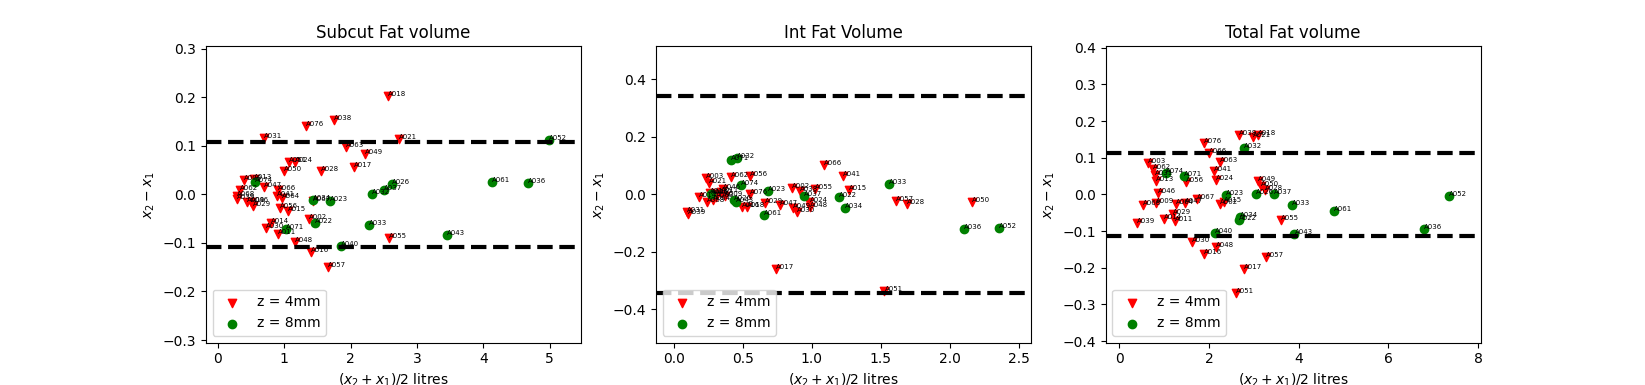

<IPython.core.display.Javascript object>


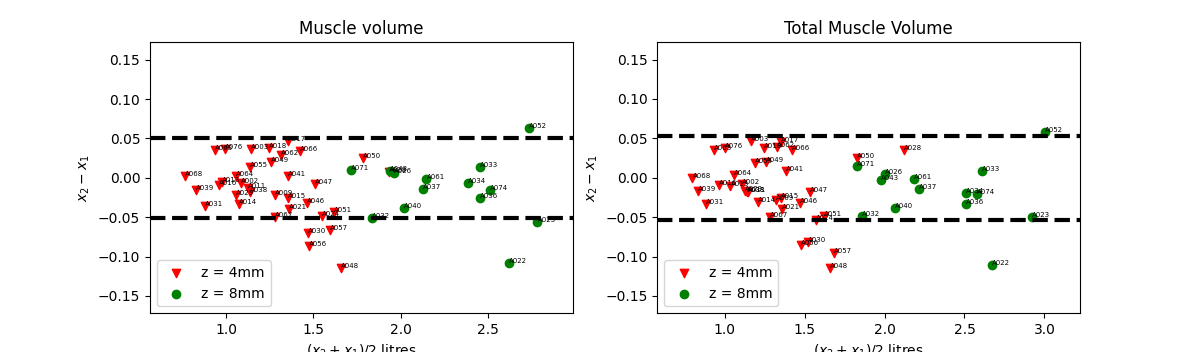

In [133]:
import os
import nibabel as nb
import numpy as np
import pandas as pd
import SimpleITK as sitk


"""Tools for repeatability calculations"""

import os
from collections import OrderedDict


import numpy as np
%matplotlib notebook
import matplotlib.pyplot as pl
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))





def plot_BA_in_axis(x1, x2, z1, z2, fname, ax, parameter_name='data', units=r'AU'):
    x1 = np.array(x1)
    x2 = np.array(x2)
#     x1 = np.log((x1)
#     x2 = np.log(x2)
    x = (x1 + x2) / 2
    d = x2 - x1
    N = x1.size

#     stats = repeatability_stats(x1, x2,False)
#     RC = stats['original']['r']
#     RC_CI = stats['original']['r_CI']
#     icc = stats["original"]['ICC']
#     icc_CI = stats["original"]['ICC_CI']
    
    stats = repeatability_stats(x1, x2,True)
    RC = stats['log']['r']
    RC_CI = stats['log']['r_CI']
    icc = stats["log"]['ICC']
    icc_CI = stats["log"]['ICC_CI']
    
    z1 = np.array(z1)
    z2 = np.array(z2)
   
    x44 = []
    d44 = []
    x48 = []
    d48 = []
    x84 = []
    d84 = []
    x88 = []
    d88 = []
    
    
    for i in range(0, len(x)):
        if z1[i]==4 and z2[i]==4:
            x44.append(x[i])
            d44.append(d[i])
        elif z1[i]==4 and z2[i]==8:
            x48.append(x[i])
            d48.append(d[i])
        elif z1[i]==8 and z2[i]==4:
            x84.append(x[i])
            d84.append(d[i])
        elif z1[i]==8 and z2[i]==8:
            x88.append(x[i])
            d88.append(d[i])
        else:
            print('There is something other than z = 4 or z = 8')
   
    ax.scatter(x44, d44, color = 'red', marker= 'v', label='z = 4mm')
#     ax.scatter(x48, d48, color = 'purple', marker= '*', label='z1=4  z2=8')
#     ax.scatter(x84, d84, color = 'blue', marker= '*', label='z1=8  z2=4')
    ax.scatter(x88, d88, color = 'green', marker= 'o', label='z = 8mm')
    ax.set_title(r"%s" % parameter_name, fontsize = 12.0)
    ax.set_xlabel("$(x_{2} + x_{1}) / 2$ litres", fontsize = 10.0)
    ax.set_ylabel("$x_{2} - x_{1}$ ", fontsize = 10.0)

    Dx = 0.1 * (x.max() - x.min())
    x_ = np.linspace(x.min() - Dx, x.max() + Dx, 100)

    ax.plot(x_, np.repeat(RC, x_.size), 'k--', lw=3.0)
    ax.plot(x_, np.repeat(-1.0 * RC, x_.size), 'k--', lw=3.0)
    ax.set_xlim((x_.min(), x_.max()))
    ylim = 1.5 * np.abs(np.r_[RC, d]).max()
    ax.set_ylim((-ylim, ylim))
#     ax.text(0.97, 0.97,
#             "RC = %.2f (%.2f, %.2f)\nICC = %.2f (%.2f, %.2f)" % (RC, RC_CI[0], RC_CI[1], icc, icc_CI[0], icc_CI[1]),
#             horizontalalignment='right', verticalalignment='top', fontsize=13.0, transform=ax.transAxes)
    ax.legend(loc='lower left')
    for i in range(len(x)):
        ax.text(x[i], d[i], str(fname[i]), color="black", fontsize=5)
    
    


def repeatability_stats(x1, x2, calc_log):
    # Takes in two vectors of data and provides repeatability statistics

    # Make sure they are numpy vectors and have the same shape
    x1 = np.array(x1)
    x2 = np.array(x2)
    if np.size(x1.shape) > 1 or np.size(x2.shape) > 1:
        raise Exception("x1 and x2 must be vectors")
    if not np.array_equal(x1.shape, x2.shape):
        raise Exception("x1 and x2 must have same shape!")

    # The size of the data
    N = float(x1.size)

    # First calcaulte the repeatability using the un-logged data
    # The difference between data points
    d = x2 - x1

    # The overall mean and within subject means (M and m respectively)
    m = (x1 + x2) / 2
    M = np.mean(m)

    ddof = 0 # For now the degrees of freedom is 0 (assume x1 and x2 are not biased)

    # Inverse chi-square values for CI calcaultion
    ichi_025 = scipy.stats.chi2.ppf(0.025, N)
    ichi_975 = scipy.stats.chi2.ppf(0.975, N)

    sw = np.sqrt(np.sum(d**2)/(2.0 * (N-ddof)))
    sw_CI = np.array([sw * np.sqrt(N / ichi_975), sw * np.sqrt(N / ichi_025)])
    sw_CoV = sw/M * 100.0
    # Should we have a sw_COV_CI here?  Need to determine what this would be given error in M!

    r = 1.96 * np.sqrt(2) * sw
    r_CI = 1.96 * np.sqrt(2) * sw_CI
    r_CoV = r/M * 100.0

    # Between-subject mean squares and within-subject mean squares respectively
    BMS = (2.0 / (N-ddof)) * np.sum((m - M) ** 2)
    WMS = np.sum((x1 - m) ** 2 + (x2 - m) ** 2) / (N-ddof)

    sb = np.sqrt((BMS-WMS)/2)
    sb_CoV = sb/M * 100.0

    ICC = sb**2 / (sb**2 + sw**2)
    F0 = BMS / WMS
    FU = F0 * scipy.stats.f.ppf(0.975, N, N - 1)
    FL = F0 / scipy.stats.f.ppf(0.975, N - 1, N)
    ICC_CI = [(FL - 1) / (FL + 1), (FU - 1) / (FU + 1)]

    stats = {}
    stats["original"] = {'sw':sw, 'sw_CI':sw_CI, 'sw_CoV':sw_CoV,
                         'r':r, 'r_CI':r_CI, 'r_CoV':r_CoV,
                         'sb':sb, 'sb_CoV':sb_CoV,
                         'BMS':BMS, 'WMS':WMS, 'ICC':ICC, 'ICC_CI':ICC_CI}

    if calc_log:
        # Now perform for the logarithm of the data
        x1 = np.log(x1)
        x2 = np.log(x2)

        d = x2 - x1

        # The overall mean and within subject means (M and m respectively)
        m = (x1 + x2) / 2
        M = np.mean(m)

        sw = np.sqrt(np.sum(d ** 2) / (2.0 * (N - ddof)))
        sw_CI = np.array([sw * np.sqrt(N / ichi_975), sw * np.sqrt(N / ichi_025)])
        sw_CoV = np.sqrt(np.exp(sw ** 2) - 1) * 100.0
        sw_CoV_CI = np.sqrt(np.exp(sw_CI ** 2) - 1) * 100.0

        r = 1.96 * np.sqrt(2) * sw
        r_CI = 1.96 * np.sqrt(2) * sw_CI

        LoA = np.r_[np.exp(-1.96 * sw * np.sqrt(2)) - 1, np.exp(+1.96 * sw * np.sqrt(2)) - 1] * 100.
        LoA_CI = np.r_[np.exp(-1.96 * sw_CI[::-1] * np.sqrt(2)) - 1, np.exp(+1.96 * sw_CI * np.sqrt(2)) - 1] * 100.
        # Reverse the sign to ensure LoA CI in increasgin order.

        # Between-subject mean squares and within-subject mean squares respectively
        BMS = (2.0 / (N - ddof)) * np.sum((m - M) ** 2)
        WMS = np.sum((x1 - m) ** 2 + (x2 - m) ** 2) / (N - ddof)

        sb = np.sqrt((BMS - WMS) / 2)
        sb_CoV = np.sqrt(np.exp(sb ** 2) - 1) * 100.0

        ICC = sb ** 2 / (sb ** 2 + sw ** 2)
        F0 = BMS / WMS
        FU = F0 * scipy.stats.f.ppf(0.975, N, N - 1)
        FL = F0 / scipy.stats.f.ppf(0.975, N - 1, N)
        ICC_CI = [(FL - 1) / (FL + 1), (FU - 1) / (FU + 1)]

        stats['log'] = {'sw': sw, 'sw_CI': sw_CI, 'sw_CoV': sw_CoV, 'sw_CoV_CI':sw_CoV_CI,
                        'r': r, 'r_CI': r_CI,
                        'LoA':LoA, 'LoA_CI':LoA_CI,
                        'sb': sb, 'sb_CoV': sb_CoV,
                        'BMS': BMS, 'WMS': WMS, 'ICC': ICC, 'ICC_CI': ICC_CI}

    return stats

'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        
def main():
    exptfolder = 'm19swinvotex'
    psoasdata = 'okplusno'
    numcases = '49'
    dirName = f'/Users/bthomas/Downloads/data_for_Belvin/midl24/{exptfolder}/seg_v1v2/{psoasdata}/after_cc'
    # Get the list of all files in directory tree at given path
    listOfFiles = getListOfFiles(dirName)
    numfiles=0
    dfscan1 = pd.DataFrame(columns=['Patient','Visit','subcutfatvol','intfatvol','psoasvol','musclevol','totalfatvol','totalmusclevol', 'zdim'])
    dfscan2 = pd.DataFrame(columns=['Patient','Visit','subcutfatvol','intfatvol','psoasvol','musclevol','totalfatvol','totalmusclevol','zdim'])
    for elem in listOfFiles:
        if elem.endswith("T2W.nii.gz"):
#             print('Current file is ', elem)
            filename = elem[91:109]
            visitnum = int(elem[97])
            mask = sitk.ReadImage(elem)
            maskarray = sitk.GetArrayFromImage(mask)
            subcutfat = maskarray == 2
            intfat = maskarray == 3
            psoas = maskarray == 4
            muscle = maskarray == 5
            totalfat = subcutfat + intfat
            totalmuscle = psoas + muscle
            
            img = nb.load(f'/Users/bthomas/Downloads/data_for_Belvin/repeatability/forPlot/img/{filename}')
            zdim = np.round(img.header['pixdim'][3],3)
            voxelvol = np.prod(img.header['pixdim'][1:4])/(1e+6)
            
            subcutfatvol = np.sum(subcutfat) * voxelvol 
            intfatvol = np.sum(intfat) * voxelvol
            psoasvol = np.sum(psoas) * voxelvol
            musclevol = np.sum(muscle) * voxelvol
            totalfatvol = np.sum(totalfat) * voxelvol
            totalmusclevol = np.sum(totalmuscle) * voxelvol
            numfiles+=1
            if visitnum == 1:
                dfscan1 = dfscan1.append({'Patient':elem[91:95], 'Visit': visitnum,\
                            'subcutfatvol':subcutfatvol,'intfatvol':intfatvol,\
                            'psoasvol':psoasvol,'musclevol':musclevol,\
                            'totalfatvol':totalfatvol, 'totalmusclevol':totalmusclevol, 'zdim':zdim},ignore_index=True)
            elif visitnum == 2:
                dfscan2 = dfscan2.append({'Patient':elem[91:95], 'Visit': visitnum,\
                            'subcutfatvol':subcutfatvol,'intfatvol':intfatvol,\
                            'psoasvol':psoasvol,'musclevol':musclevol,\
                            'totalfatvol':totalfatvol, 'totalmusclevol':totalmusclevol, 'zdim':zdim},ignore_index=True)
            else:
                print('Scan is not from visit 1 or visit 2 ')
                                          
    print(numfiles, 'files read')
    df1 = dfscan1.sort_values("Patient",ascending = True, ignore_index=True)
#     print(df1)
    df2 = dfscan2.sort_values("Patient",ascending = True, ignore_index=True)
#     print(df2)
    df1cut = np.array(df1.iloc[:, 2:8])
    df2cut = np.array(df2.iloc[:, 2:8])
    dfpatients = df1.iloc[:, 0:2]
    dfdiff = pd.concat([dfpatients,pd.DataFrame(df2cut-df1cut)],axis=1,ignore_index=True)
                                          
    with pd.ExcelWriter(f'{dirName}/../volumedata_V1V2_{numcases}.xlsx') as writer:
        df1.to_excel(writer, sheet_name='Visit 1')
        df2.to_excel(writer, sheet_name='Visit 2')
        dfdiff.to_excel(writer, sheet_name='V2-V1')

    subcutfat1 = df1["subcutfatvol"]
    subcutfat2 = df2["subcutfatvol"]
    intfat1 = df1["intfatvol"]
    intfat2 = df2["intfatvol"]
    psoas1 = df1["psoasvol"]
    psoas2 = df2["psoasvol"]
    muscle1 = df1["musclevol"]
    muscle2 = df2["musclevol"]
    totalfat1 = df1["totalfatvol"]
    totalfat2 = df2["totalfatvol"]
    totalmuscle1 = df1["totalmusclevol"]
    totalmuscle2 = df2["totalmusclevol"]
    zdim1 = df1["zdim"]
    zdim2 = df2["zdim"]
    fname = df1["Patient"]
    
    sfstats = repeatability_stats(subcutfat1, subcutfat2, calc_log=True)
    ifstats = repeatability_stats(intfat1, intfat2, calc_log=True)
#     pstats = repeatability_stats(psoas1, psoas2, calc_log=True)
    mstats = repeatability_stats(muscle1, muscle2, calc_log=True)
    tfstats = repeatability_stats(totalfat1, totalfat2, calc_log=True)
    tmstats = repeatability_stats(totalmuscle1, totalmuscle2, calc_log=True)

    savedata = {'TissueType':['SubcutFat','IntFat','Muscle','TotalFat','TotalMuscle'],
               'wCV': [sfstats['log']['sw_CoV'],ifstats['log']['sw_CoV'],mstats['log']['sw_CoV'],tfstats['log']['sw_CoV'],tmstats['log']['sw_CoV']],
               'ICC': [sfstats['log']['ICC'],ifstats['log']['ICC'],mstats['log']['ICC'],tfstats['log']['ICC'],tmstats['log']['ICC']],
               'LoA': [sfstats['log']['LoA'],ifstats['log']['LoA'],mstats['log']['LoA'],tfstats['log']['LoA'],tmstats['log']['LoA']]}

    data = {
    'Stats': ['sw', 'sw_CI',  'wCV (%)', 'r', 'r_CI','ICC', 'ICC_CI', 'LoA(%RCL, %RCU)', 'LoA_CI'],
    'SubcutFat(log)': [np.round(sfstats['log']['sw'],3),np.round(sfstats['log']['sw_CI'],3),np.round(sfstats['log']['sw_CoV'],3),\
                       np.round(sfstats['log']['r'],3),np.round(sfstats['log']['r_CI'],3),\
                       np.round(sfstats['log']['ICC'],3),np.round(sfstats['log']['ICC_CI'],3),\
                       np.round(sfstats['log']['LoA'],3),np.round(sfstats['log']['LoA_CI'],3)],
    'IntFat(log)': [np.round(ifstats['log']['sw'],3),np.round(ifstats['log']['sw_CI'],3),np.round(ifstats['log']['sw_CoV'],3),\
                       np.round(ifstats['log']['r'],3),np.round(ifstats['log']['r_CI'],3),\
                       np.round(ifstats['log']['ICC'],3),np.round(ifstats['log']['ICC_CI'],3),\
                       np.round(ifstats['log']['LoA'],3),np.round(ifstats['log']['LoA_CI'],3)],
#     'Psoas(log)': [np.round(pstats['log']['sw'],3),np.round(pstats['log']['sw_CI'],3),np.round(pstats['log']['sw_CoV'],3),\
#                        np.round(pstats['log']['r'],3),np.round(pstats['log']['r_CI'],3),\
#                        np.round(pstats['log']['ICC'],3),np.round(pstats['log']['ICC_CI'],3),\
#                        np.round(pstats['log']['LoA'],3),np.round(pstats['log']['LoA_CI'],3)],
    'Muscle(log)': [np.round(mstats['log']['sw'],3),np.round(mstats['log']['sw_CI'],3),np.round(mstats['log']['sw_CoV'],3),\
                       np.round(mstats['log']['r'],3),np.round(mstats['log']['r_CI'],3),\
                       np.round(mstats['log']['ICC'],3),np.round(mstats['log']['ICC_CI'],3),\
                       np.round(mstats['log']['LoA'],3),np.round(mstats['log']['LoA_CI'],3)],
    'TotalFat(log)': [np.round(tfstats['log']['sw'],3),np.round(tfstats['log']['sw_CI'],3),np.round(tfstats['log']['sw_CoV'],3),\
                       np.round(tfstats['log']['r'],3),np.round(tfstats['log']['r_CI'],3),\
                       np.round(tfstats['log']['ICC'],3),np.round(tfstats['log']['ICC_CI'],3),\
                       np.round(tfstats['log']['LoA'],3),np.round(tfstats['log']['LoA_CI'],3)],
    'TotalMuscle(log)': [np.round(tmstats['log']['sw'],3),np.round(tmstats['log']['sw_CI'],3),np.round(tmstats['log']['sw_CoV'],3),\
                       np.round(tmstats['log']['r'],3),np.round(tmstats['log']['r_CI'],3),\
                       np.round(tmstats['log']['ICC'],3),np.round(tmstats['log']['ICC_CI'],3),\
                       np.round(tmstats['log']['LoA'],3),np.round(tmstats['log']['LoA_CI'],3)]
    }
    dfstats = pd.DataFrame(data)
    dfsave = pd.DataFrame(savedata)
    print(exptfolder)
    display(dfstats)
    with pd.ExcelWriter(f'/Users/bthomas/Downloads/data_for_Belvin/midl24/repstats_{exptfolder}.xlsx') as writer:
        dfstats.to_excel(writer, sheet_name='Repeatability')
        dfsave.to_excel(writer, sheet_name='Savestats4Plot')
    
    f1, ax1 = pl.subplots(1,3) 
    plot_BA_in_axis(subcutfat1, subcutfat2, zdim1, zdim2, fname, ax1[0], parameter_name='Subcut Fat volume', units=r'AU')
    plot_BA_in_axis(intfat1, intfat2, zdim1, zdim2, fname, ax1[1], parameter_name='Int Fat Volume', units=r'AU')
    plot_BA_in_axis(totalfat1, totalfat2, zdim1, zdim2, fname, ax1[2], parameter_name='Total Fat volume', units=r'AU')
    pl.show()
    
    f2, ax2 = pl.subplots(1,2)
#     plot_BA_in_axis(psoas1, psoas2, zdim1, zdim2, fname, ax2[0], parameter_name='Psoas volume', units=r'AU')
    plot_BA_in_axis(muscle1, muscle2, zdim1, zdim2, fname, ax2[0], parameter_name='Muscle volume', units=r'AU')
    plot_BA_in_axis(totalmuscle1, totalmuscle2, zdim1, zdim2, fname, ax2[1], parameter_name='Total Muscle Volume', units=r'AU')
    pl.show()
    
#create Bland-Altman plot using statsmodels api 
#     import statsmodels.api as sm
    
#     f3, ax3 = pl.subplots(1,2)
#     ax3[0].set_title("Subcut fat volume")
#     sm.graphics.mean_diff_plot(subcutfat1, subcutfat2, ax = ax3[0])
#     sm.graphics.mean_diff_plot(intfat1, intfat2, ax = ax3[1])
#     ax3[1].set_title("Int fat volume")
#     pl.show()
    
#     f4, ax4 = pl.subplots(1,2)
#     ax4[0].set_title("Psoas volume")
#     sm.graphics.mean_diff_plot(psoas1, psoas2, ax = ax4[0])
#     ax4[1].set_title("Muscle volume")
#     sm.graphics.mean_diff_plot(muscle1, muscle2, ax = ax4[1])
#     pl.show()
    
#     f5, ax5 = pl.subplots(1,2)
#     ax5[0].set_title("Total Fat volume")
#     sm.graphics.mean_diff_plot(totalfat1, totalfat2, ax = ax5[0])
#     ax5[1].set_title("Total Muscle volume")
#     sm.graphics.mean_diff_plot(totalmuscle1, totalmuscle2, ax = ax5[1])
#     pl.show()

        
if __name__ == '__main__':
    main()

/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_94604/348596718.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


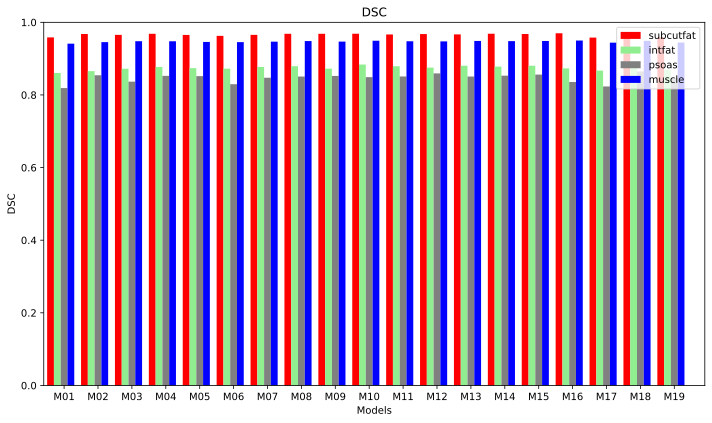

In [1]:
# DSC
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df1 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='subcutfat')
df2 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='intfat')
df3 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='psoas')
df4 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='muscle')

dsc1 = df1['DSC']
dsc2 = df2['DSC']
dsc3 = df3['DSC']
dsc4 = df4['DSC']

x = np.arange(len(dsc1))

bar_width = 0.2


fig1, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(x - 1.5 * bar_width, dsc1, bar_width, label='subcutfat', color='red')
ax1.bar(x - 0.5 * bar_width, dsc2, bar_width, label='intfat', color='lightgreen')
ax1.bar(x + 0.5 * bar_width, dsc3, bar_width, label='psoas', color='gray')
ax1.bar(x + 1.5 * bar_width, dsc4, bar_width, label='muscle', color='blue')

ax1.set_xlabel('Models')
ax1.set_ylabel('DSC')
ax1.set_title('DSC')
ax1.legend()

# Add space between groups
ax1.set_xlim(-0.5, len(dsc1))
ax1.set_xticks(x + 0.5 * bar_width * 1)
ax1.set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
ax1.set_ylim([0, 1])

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_94604/2035299510.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


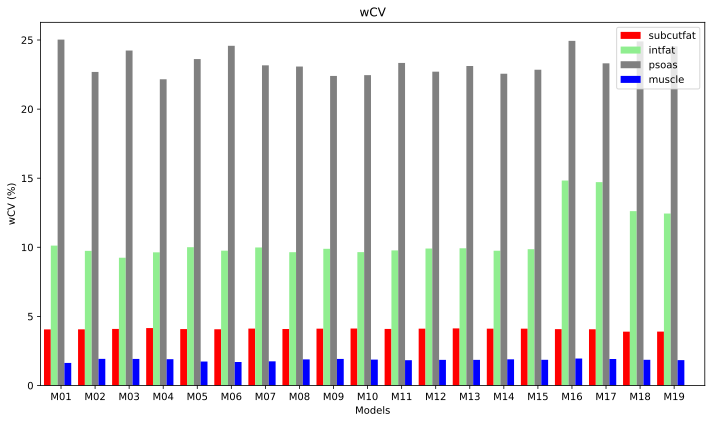

In [2]:
# wCV
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df1 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='subcutfat')
df2 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='intfat')
df3 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='psoas')
df4 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='muscle')

wCV1 = df1['wCV']
wCV2 = df2['wCV']
wCV3 = df3['wCV']
wCV4 = df4['wCV']

x = np.arange(len(wCV1))

bar_width = 0.2

fig2, ax2 = plt.subplots(figsize=(10, 6))


ax2.bar(x - 1.5 * bar_width, wCV1, bar_width, label='subcutfat', color='red')
ax2.bar(x - 0.5 * bar_width, wCV2, bar_width, label='intfat', color='lightgreen')
ax2.bar(x + 0.5 * bar_width, wCV3, bar_width, label='psoas', color='gray')
ax2.bar(x + 1.5 * bar_width, wCV4, bar_width, label='muscle', color='blue')

ax2.set_xlabel('Models')
ax2.set_ylabel('wCV (%)')
ax2.set_title('wCV')
ax2.legend()


ax2.set_xlim(-0.5, len(wCV1))
ax2.set_xticks(x + 0.5 * bar_width * 1)
ax2.set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_94604/1799628333.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


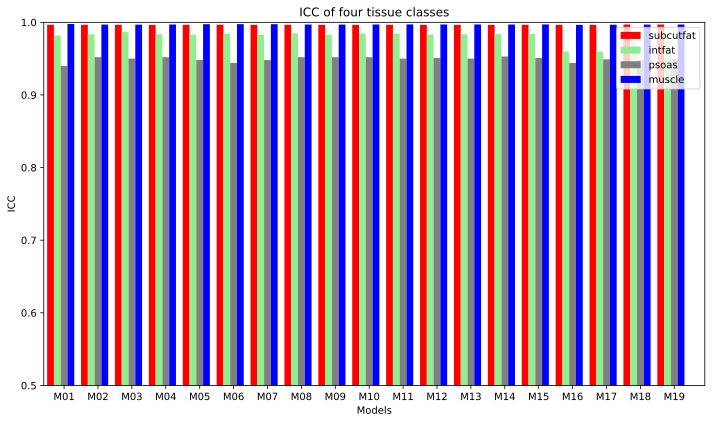

In [3]:
# ICC
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df1 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='subcutfat')
df2 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='intfat')
df3 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='psoas')
df4 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='muscle')

ICC1 = df1['ICC']
ICC2 = df2['ICC']
ICC3 = df3['ICC']
ICC4 = df4['ICC']

x = np.arange(len(ICC1))

bar_width = 0.2

fig3, ax3 = plt.subplots(figsize=(10, 6))


ax3.bar(x - 1.5 * bar_width, ICC1, bar_width, label='subcutfat', color='red')
ax3.bar(x - 0.5 * bar_width, ICC2, bar_width, label='intfat', color='lightgreen')
ax3.bar(x + 0.5 * bar_width, ICC3, bar_width, label='psoas', color='gray')
ax3.bar(x + 1.5 * bar_width, ICC4, bar_width, label='muscle', color='blue')

ax3.set_xlabel('Models')
ax3.set_ylabel('ICC')
ax3.set_title('ICC of four tissue classes')
ax3.legend()


ax3.set_xlim(-0.5, len(ICC1))
ax3.set_xticks(x + 0.5 * bar_width * 1)
ax3.set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
ax3.set_ylim([0.5,1])
# Show the plot
plt.tight_layout()
plt.show()


/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_94604/3743923166.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


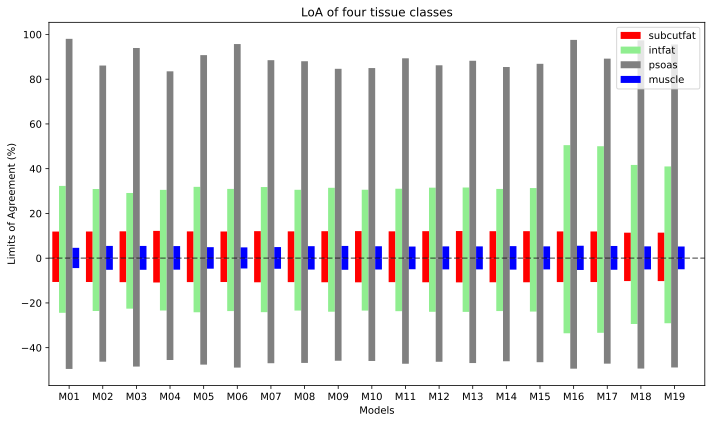

In [4]:
# LoA
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


import matplotlib.pyplot as plt
import numpy as np
import ast

import pandas as pd

df1 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='subcutfat')
df2 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='intfat')
df3 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='psoas')
df4 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='muscle')

loa1 = list(df1['LoA'])
loa2 = list(df2['LoA'])
loa3 = list(df3['LoA'])
loa4 = list(df4['LoA'])

def convertLOA(data):
    listpos = []
    listneg = []
    for row in data:
        numbers = ast.literal_eval(row)
        for number in numbers:
            if number > 0:
                listpos.append(number)
            else:
                listneg.append(number)
        
    return listpos,listneg

list1_pos,list1_neg = convertLOA(loa1)
list2_pos,list2_neg = convertLOA(loa2)
list3_pos,list3_neg = convertLOA(loa3)
list4_pos,list4_neg = convertLOA(loa4)


x = np.arange(len(list1_pos))

# Set the width of each bar
bar_width = 0.2

# Create subplots
fig4, ax4 = plt.subplots(figsize=(10, 6))

# Plot positive values as bars (to the top of the hor axis)

ax4.bar(x - 1.5 * bar_width, list1_pos, bar_width, label='subcutfat', color='red')
ax4.bar(x - 0.5 * bar_width, list2_pos, bar_width, label='intfat', color='lightgreen')
ax4.bar(x + 0.5 * bar_width, list3_pos, bar_width, label='psoas', color='gray')
ax4.bar(x + 1.5 * bar_width, list4_pos, bar_width, label='muscle', color='blue')


# Plot negative values as bars (to the bottom of the hor axis)
ax4.bar(x - 1.5 * bar_width, list1_neg, bar_width, color='red')
ax4.bar(x - 0.5 * bar_width, list2_neg, bar_width, color='lightgreen')
ax4.bar(x + 0.5 * bar_width, list3_neg, bar_width, color='gray')
ax4.bar(x + 1.5 * bar_width, list4_neg, bar_width, color='blue')

ax4.set_xlabel('Models')
ax4.set_ylabel('Limits of Agreement (%)')
ax4.set_title('LoA of four tissue classes')
ax4.legend()
ax4.axhline(0, color='black', alpha=0.5,linestyle='--')

# Add space between groups
ax4.set_xlim(-0.5, len(list1_pos))
ax4.set_xticks(x + 0.5 * bar_width * 1)
ax4.set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
# ax.set_ylim([0.80, 1])

# Show the plot
plt.tight_layout()
plt.show()



/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_34852/1709669464.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


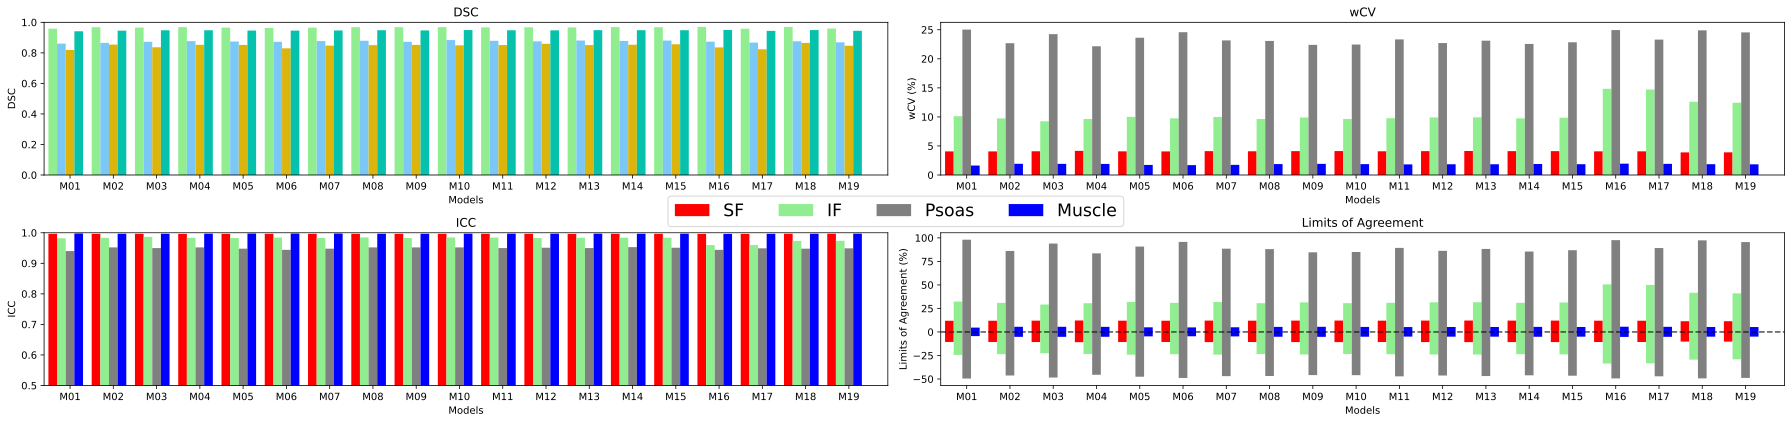

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

import numpy as np
import ast
import pandas as pd

df1 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='subcutfat')
df2 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='intfat')
df3 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='psoas')
df4 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='muscle')

dsc1 = df1['DSC']
dsc2 = df2['DSC']
dsc3 = df3['DSC']
dsc4 = df4['DSC']

x = np.arange(len(dsc1))

bar_width = 0.2

fig, axs = plt.subplots(2,2, figsize=(25,6))
# fig1, ax1 = plt.subplots(figsize=(10, 6))


axs[0, 0].bar(x - 1.5 * bar_width, dsc1, bar_width, color='red')
axs[0, 0].bar(x - 0.5 * bar_width, dsc2, bar_width, color='lightgreen')
axs[0, 0].bar(x + 0.5 * bar_width, dsc3, bar_width, color='gray')
axs[0, 0].bar(x + 1.5 * bar_width, dsc4, bar_width, color='blue')

axs[0, 0].set_xlabel('Models')
axs[0, 0].set_ylabel('DSC')
axs[0, 0].set_title('DSC')
# axs[0, 0].legend()

# Add space between groups
axs[0, 0].set_xlim(-0.5, len(dsc1))
axs[0, 0].set_xticks(x + 0.5 * bar_width * 1)
axs[0, 0].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
axs[0, 0].set_ylim([0, 1])



ICC1 = df1['ICC']
ICC2 = df2['ICC']
ICC3 = df3['ICC']
ICC4 = df4['ICC']

axs[1,0].bar(x - 1.5 * bar_width, ICC1, bar_width, color='red')
axs[1,0].bar(x - 0.5 * bar_width, ICC2, bar_width, color='lightgreen')
axs[1,0].bar(x + 0.5 * bar_width, ICC3, bar_width, color='gray')
axs[1,0].bar(x + 1.5 * bar_width, ICC4, bar_width, color='blue')

axs[1,0].set_xlabel('Models')
axs[1,0].set_ylabel('ICC')
axs[1,0].set_title('ICC')
# axs[0, 1].legend()


axs[1,0].set_xlim(-0.5, len(ICC1))
axs[1,0].set_xticks(x + 0.5 * bar_width * 1)
axs[1,0].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
axs[1,0].set_ylim([0.5,1])




loa1 = list(df1['LoA'])
loa2 = list(df2['LoA'])
loa3 = list(df3['LoA'])
loa4 = list(df4['LoA'])


wCV1 = df1['wCV']
wCV2 = df2['wCV']
wCV3 = df3['wCV']
wCV4 = df4['wCV']


axs[0, 1].bar(x - 1.5 * bar_width, wCV1, bar_width, color='red')
axs[0, 1].bar(x - 0.5 * bar_width, wCV2, bar_width, color='lightgreen')
axs[0, 1].bar(x + 0.5 * bar_width, wCV3, bar_width, color='gray')
axs[0, 1].bar(x + 1.5 * bar_width, wCV4, bar_width, color='blue')

axs[0, 1].set_xlabel('Models')
axs[0, 1].set_ylabel('wCV (%)')
axs[0, 1].set_title('wCV')


axs[0, 1].set_xlim(-0.5, len(wCV1))
axs[0, 1].set_xticks(x + 0.5 * bar_width * 1)
axs[0, 1].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])


def convertLOA(data):
    listpos = []
    listneg = []
    for row in data:
        numbers = ast.literal_eval(row)
        for number in numbers:
            if number > 0:
                listpos.append(number)
            else:
                listneg.append(number)
        
    return listpos,listneg

list1_pos,list1_neg = convertLOA(loa1)
list2_pos,list2_neg = convertLOA(loa2)
list3_pos,list3_neg = convertLOA(loa3)
list4_pos,list4_neg = convertLOA(loa4)


# Plot positive values as bars (to the top of the hor axis)

axs[1, 1].bar(x - 1.5 * bar_width, list1_pos, bar_width, label='SF', color='red')
axs[1, 1].bar(x - 0.5 * bar_width, list2_pos, bar_width, label='IF', color='lightgreen')
axs[1, 1].bar(x + 0.5 * bar_width, list3_pos, bar_width, label='Psoas', color='gray')
axs[1, 1].bar(x + 1.5 * bar_width, list4_pos, bar_width, label='Muscle', color='blue')


# Plot negative values as bars (to the bottom of the hor axis)
axs[1, 1].bar(x - 1.5 * bar_width, list1_neg, bar_width, color='red')
axs[1, 1].bar(x - 0.5 * bar_width, list2_neg, bar_width, color='lightgreen')
axs[1, 1].bar(x + 0.5 * bar_width, list3_neg, bar_width, color='gray')
axs[1, 1].bar(x + 1.5 * bar_width, list4_neg, bar_width, color='blue')

axs[1, 1].set_xlabel('Models')
axs[1, 1].set_ylabel('Limits of Agreement (%)')
axs[1, 1].set_title('Limits of Agreement')
# axs[1, 1].legend()
axs[1, 1].axhline(0, color='black', alpha=0.7,linestyle='--')

# Add space between groups
axs[1, 1].set_xlim(-0.5, len(list1_pos))
axs[1, 1].set_xticks(x + 0.5 * bar_width * 1)
axs[1, 1].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
common_legend = fig.legend(loc='center', bbox_to_anchor=(0.5, 0.5, 0, 0), fontsize='xx-large',ncol=4)
# Adjust layout and save as PDF
plt.tight_layout()
# plt.savefig("/Users/bthomas/Downloads/data_for_Belvin/midl24/combined_figures.pdf")

# Show the combined figure (optional)
plt.show()



/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_34852/4160924317.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


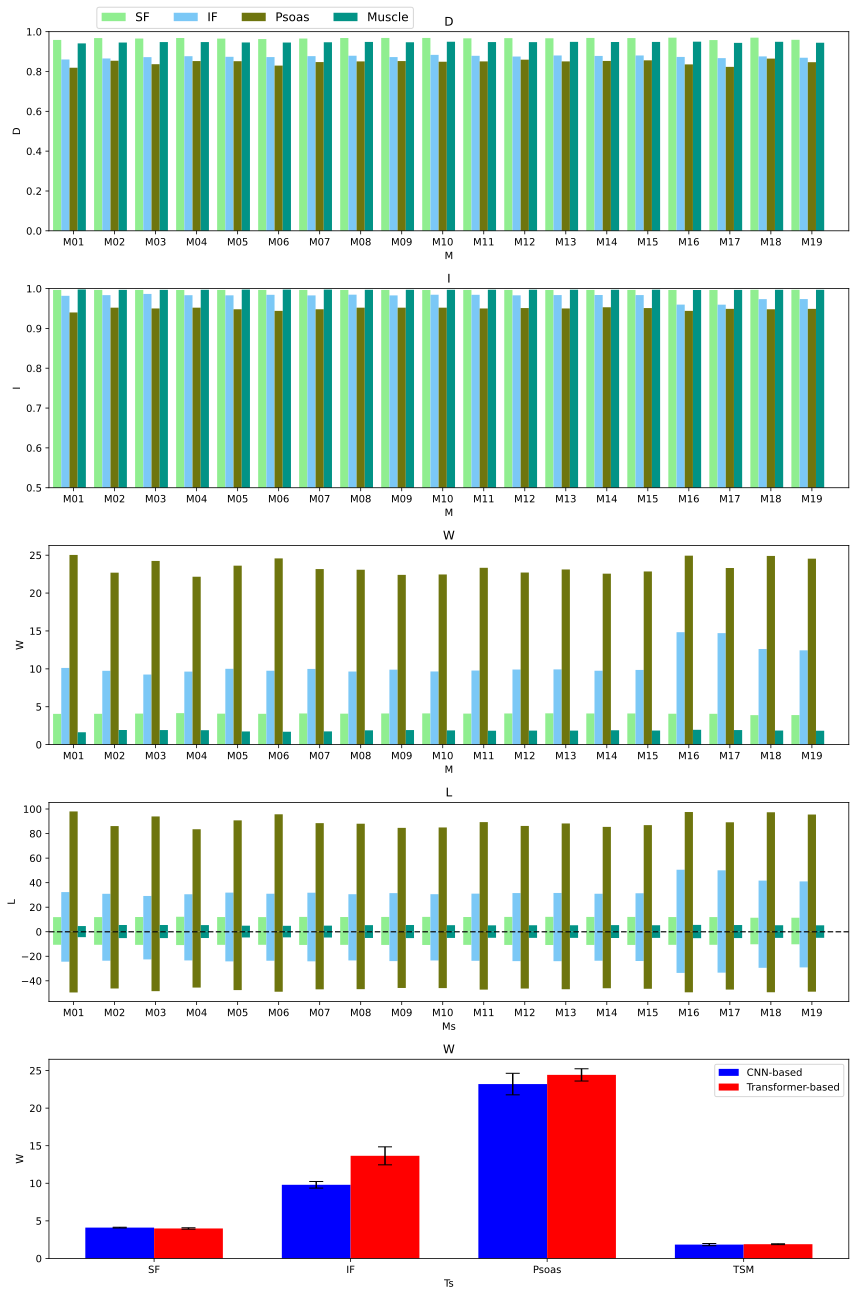

In [53]:
# ESMRMB 1 column 5 rows

import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

import numpy as np
import ast
import pandas as pd

df1 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='subcutfat')
df2 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='intfat')
df3 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='psoas')
df4 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='muscle')

dsc1 = df1['DSC']
dsc2 = df2['DSC']
dsc3 = df3['DSC']
dsc4 = df4['DSC']

x = np.arange(len(dsc1))

bar_width = 0.2

fig, axs = plt.subplots(5,1, figsize=(12,18))
# fig1, ax1 = plt.subplots(figsize=(10, 6))


axs[0].bar(x - 1.5 * bar_width, dsc1, bar_width, color='lightgreen')
axs[0].bar(x - 0.5 * bar_width, dsc2, bar_width, color='xkcd:lightblue')
axs[0].bar(x + 0.5 * bar_width, dsc3, bar_width, color='xkcd:olive')
axs[0].bar(x + 1.5 * bar_width, dsc4, bar_width, color='xkcd:teal')

axs[0].set_xlabel('M')
axs[0].set_ylabel('D')
axs[0].set_title('D')
# axs[0, 0].legend()

# Add space between groups
axs[0].set_xlim(-0.5, len(dsc1))
axs[0].set_xticks(x + 0.5 * bar_width * 1)
axs[0].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
axs[0].set_ylim([0, 1])



ICC1 = df1['ICC']
ICC2 = df2['ICC']
ICC3 = df3['ICC']
ICC4 = df4['ICC']

axs[1].bar(x - 1.5 * bar_width, ICC1, bar_width, color='lightgreen')
axs[1].bar(x - 0.5 * bar_width, ICC2, bar_width, color='xkcd:lightblue')
axs[1].bar(x + 0.5 * bar_width, ICC3, bar_width, color='xkcd:olive')
axs[1].bar(x + 1.5 * bar_width, ICC4, bar_width, color='xkcd:teal')

axs[1].set_xlabel('M')
axs[1].set_ylabel('I')
axs[1].set_title('I')
# axs[0, 1].legend()


axs[1].set_xlim(-0.5, len(ICC1))
axs[1].set_xticks(x + 0.5 * bar_width * 1)
axs[1].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
axs[1].set_ylim([0.5,1])




loa1 = list(df1['LoA'])
loa2 = list(df2['LoA'])
loa3 = list(df3['LoA'])
loa4 = list(df4['LoA'])


wCV1 = df1['wCV']
wCV2 = df2['wCV']
wCV3 = df3['wCV']
wCV4 = df4['wCV']


axs[2].bar(x - 1.5 * bar_width, wCV1, bar_width, color='lightgreen')
axs[2].bar(x - 0.5 * bar_width, wCV2, bar_width, color='xkcd:lightblue')
axs[2].bar(x + 0.5 * bar_width, wCV3, bar_width, color='xkcd:olive')
axs[2].bar(x + 1.5 * bar_width, wCV4, bar_width, color='xkcd:teal')


axs[2].set_xlabel('M')
axs[2].set_ylabel('W')
axs[2].set_title('W')


axs[2].set_xlim(-0.5, len(wCV1))
axs[2].set_xticks(x + 0.5 * bar_width * 1)
axs[2].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])


def convertLOA(data):
    listpos = []
    listneg = []
    for row in data:
        numbers = ast.literal_eval(row)
        for number in numbers:
            if number > 0:
                listpos.append(number)
            else:
                listneg.append(number)
        
    return listpos,listneg

list1_pos,list1_neg = convertLOA(loa1)
list2_pos,list2_neg = convertLOA(loa2)
list3_pos,list3_neg = convertLOA(loa3)
list4_pos,list4_neg = convertLOA(loa4)


# Plot positive values as bars (to the top of the hor axis)

axs[3].bar(x - 1.5 * bar_width, list1_pos, bar_width, label='SF', color='lightgreen')
axs[3].bar(x - 0.5 * bar_width, list2_pos, bar_width, label='IF', color='xkcd:lightblue')
axs[3].bar(x + 0.5 * bar_width, list3_pos, bar_width, label='Psoas', color='xkcd:olive')
axs[3].bar(x + 1.5 * bar_width, list4_pos, bar_width, label='Muscle', color='xkcd:teal')


# Plot negative values as bars (to the bottom of the hor axis)
axs[3].bar(x - 1.5 * bar_width, list1_neg, bar_width, color='lightgreen')
axs[3].bar(x - 0.5 * bar_width, list2_neg, bar_width, color='xkcd:lightblue')
axs[3].bar(x + 0.5 * bar_width, list3_neg, bar_width, color='xkcd:olive')
axs[3].bar(x + 1.5 * bar_width, list4_neg, bar_width, color='xkcd:teal')

axs[3].set_xlabel('Ms')
axs[3].set_ylabel('L')
axs[3].set_title('L')
# axs[1, 1].legend()
axs[3].axhline(0, color='black', alpha=0.8,linestyle='--')

# Add space between groups
axs[3].set_xlim(-0.5, len(list1_pos))
axs[3].set_xticks(x + 0.5 * bar_width * 1)
axs[3].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
common_legend = fig.legend(loc='center', bbox_to_anchor=(0.3, 0.99, 0, 0), fontsize='large',ncol=4)






# sfatdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='subcutfat')
# ifatdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='intfat')
# psoasdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='psoas')
# tsmdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='muscle')

# wCVsfat = sfatdf['wCV']
# wCVifat = ifatdf['wCV']
# wCVpsoas = psoasdf['wCV']
# wCVtsm = tsmdf['wCV']

dfcnn = pd.DataFrame({ 'SF': df1['wCV'][:15], 'IF': df2['wCV'][:15], 'Psoas': df3['wCV'][:15], 'TSM': df4['wCV'][:15]})
dftfr = pd.DataFrame({ 'SF': df1['wCV'][-4:], 'IF': df2['wCV'][-4:], 'Psoas': df3['wCV'][-4:], 'TSM': df4['wCV'][-4:]})
cols = list(dfcnn.columns) 

means1 = dfcnn.mean()
means2 = dftfr.mean()

mins1 = dfcnn.min()
maxs1 = dfcnn.max()

mins2 = dftfr.min()
maxs2 = dftfr.max()

error_bars1 = [(maxs1[col] - mins1[col])/2 for col in cols]
error_bars2 = [(maxs2[col] - mins2[col])/2 for col in cols]

index = range(len(cols))

# plt.figure(figsize=(8,6))
bar_widthE = 0.35
axs[4].bar(index, means1, bar_widthE, label='CNN-based',  yerr=error_bars1, capsize=7, color ='blue')
axs[4].bar([i + bar_widthE for i in index], means2, bar_widthE, label='Transformer-based',  yerr=error_bars2, capsize=7, color ='red')
axs[4].set_xlabel('Ts')
axs[4].set_ylabel('W')
axs[4].set_title('W')
axs[4].set_xticks([i + bar_widthE/2 for i in index], cols)
axs[4].legend()
plt.tight_layout()
plt.savefig("/Users/bthomas/Downloads/data_for_Belvin/midl24/esmrmbfig2_coloradjusted.pdf")



plt.show()


In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

import numpy as np
import ast
import pandas as pd

df1 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='subcutfat')
df2 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='intfat')
df3 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='psoas')
df4 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='muscle')

loa1 = list(df1['LoA'])
loa2 = list(df2['LoA'])
loa3 = list(df3['LoA'])
loa4 = list(df4['LoA'])

fig, axs = plt.subplots(4, 1,figsize=(10, 10))


def convertLOA(data):
    listpos = []
    listneg = []
    for row in data:
        numbers = ast.literal_eval(row)
        for number in numbers:
            if number > 0:
                listpos.append(number)
            else:
                listneg.append(number)
        
    return listpos,listneg

list1_pos,list1_neg = convertLOA(loa1)
list2_pos,list2_neg = convertLOA(loa2)
list3_pos,list3_neg = convertLOA(loa3)
list4_pos,list4_neg = convertLOA(loa4)


x = np.arange(len(list1_pos))

# Set the width of each bar
bar_width = 0.2

# Create subplots
# fig4, ax4 = plt.subplots(figsize=(10, 6))





axs[0].bar(x - 1.5 * bar_width, list1_pos, bar_width, label='subcutfat', color='red')
axs[0].bar(x - 0.5 * bar_width, list2_pos, bar_width, label='intfat', color='lightgreen')
axs[0].bar(x + 0.5 * bar_width, list3_pos, bar_width, label='psoas', color='gray')
axs[0].bar(x + 1.5 * bar_width, list4_pos, bar_width, label='muscle', color='blue')


# Plot negative values as bars (to the bottom of the hor axis)
axs[0].bar(x - 1.5 * bar_width, list1_neg, bar_width, color='red')
axs[0].bar(x - 0.5 * bar_width, list2_neg, bar_width, color='lightgreen')
axs[0].bar(x + 0.5 * bar_width, list3_neg, bar_width, color='gray')
axs[0].bar(x + 1.5 * bar_width, list4_neg, bar_width, color='blue')

axs[0].set_xlabel('Models')
axs[0].set_ylabel('Limits of Agreement (%)')
axs[0].set_title('LoA of four tissue classes')
axs[0].legend()
axs[0].axhline(0, color='black', alpha=0.5,linestyle='--')

# Add space between groups
axs[0].set_xlim(-0.5, len(list1_pos))
axs[0].set_xticks(x + 0.5 * bar_width * 1)
axs[0].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
# ************************

axs[2].bar(x - 1.5 * bar_width, list1_pos, bar_width, label='subcutfat', color='red')
axs[2].bar(x - 0.5 * bar_width, list2_pos, bar_width, label='intfat', color='lightgreen')
axs[2].bar(x + 0.5 * bar_width, list3_pos, bar_width, label='psoas', color='gray')
axs[2].bar(x + 1.5 * bar_width, list4_pos, bar_width, label='muscle', color='blue')


# Plot negative values as bars (to the bottom of the hor axis)
axs[2].bar(x - 1.5 * bar_width, list1_neg, bar_width, color='red')
axs[2].bar(x - 0.5 * bar_width, list2_neg, bar_width, color='lightgreen')
axs[2].bar(x + 0.5 * bar_width, list3_neg, bar_width, color='gray')
axs[2].bar(x + 1.5 * bar_width, list4_neg, bar_width, color='blue')

axs[2].set_xlabel('Models')
axs[2].set_ylabel('Limits of Agreement (%)')
axs[2].set_title('LoA of four tissue classes')
# axs[2].legend()
axs[2].axhline(0, color='black', alpha=0.5,linestyle='--')

# Add space between groups
axs[2].set_xlim(-0.5, len(list1_pos))
axs[2].set_xticks(x + 0.5 * bar_width * 1)
axs[2].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])

# ************************

axs[1].bar(x - 1.5 * bar_width, list1_pos, bar_width, label='subcutfat', color='red')
axs[1].bar(x - 0.5 * bar_width, list2_pos, bar_width, label='intfat', color='lightgreen')
axs[1].bar(x + 0.5 * bar_width, list3_pos, bar_width, label='psoas', color='gray')
axs[1].bar(x + 1.5 * bar_width, list4_pos, bar_width, label='muscle', color='blue')


# Plot negative values as bars (to the bottom of the hor axis)
axs[1].bar(x - 1.5 * bar_width, list1_neg, bar_width, color='red')
axs[1].bar(x - 0.5 * bar_width, list2_neg, bar_width, color='lightgreen')
axs[1].bar(x + 0.5 * bar_width, list3_neg, bar_width, color='gray')
axs[1].bar(x + 1.5 * bar_width, list4_neg, bar_width, color='blue')

axs[1].set_xlabel('Models')
axs[1].set_ylabel('Limits of Agreement (%)')
axs[1].set_title('LoA of four tissue classes')
# axs[1].legend()
axs[1].axhline(0, color='black', alpha=0.5,linestyle='--')

# Add space between groups
axs[1].set_xlim(-0.5, len(list1_pos))
axs[1].set_xticks(x + 0.5 * bar_width * 1)
axs[1].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])











# Plot positive values as bars (to the top of the hor axis)

axs[3].bar(x - 1.5 * bar_width, list1_pos, bar_width, label='subcutfat', color='red')
axs[3].bar(x - 0.5 * bar_width, list2_pos, bar_width, label='intfat', color='lightgreen')
axs[3].bar(x + 0.5 * bar_width, list3_pos, bar_width, label='psoas', color='gray')
axs[3].bar(x + 1.5 * bar_width, list4_pos, bar_width, label='muscle', color='blue')


# Plot negative values as bars (to the bottom of the hor axis)
axs[3].bar(x - 1.5 * bar_width, list1_neg, bar_width, color='red')
axs[3].bar(x - 0.5 * bar_width, list2_neg, bar_width, color='lightgreen')
axs[3].bar(x + 0.5 * bar_width, list3_neg, bar_width, color='gray')
axs[3].bar(x + 1.5 * bar_width, list4_neg, bar_width, color='blue')

axs[3].set_xlabel('Models')
axs[3].set_ylabel('Limits of Agreement (%)')
axs[3].set_title('LoA of four tissue classes')
# axs[3].legend()
axs[3].axhline(0, color='black', alpha=0.5,linestyle='--')

# Add space between groups
axs[3].set_xlim(-0.5, len(list1_pos))
axs[3].set_xticks(x + 0.5 * bar_width * 1)
axs[3].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])

# Adjust layout and save as PDF
plt.tight_layout()
plt.savefig("/Users/bthomas/Downloads/data_for_Belvin/midl24/combined_figures.pdf")

# Show the combined figure (optional)
plt.show()

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_34852/1311830142.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


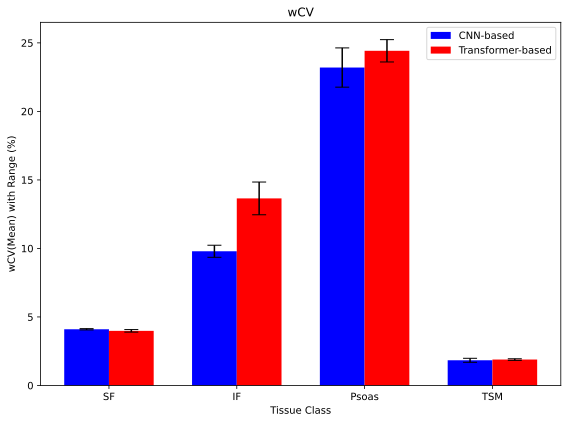

In [1]:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sfatdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='subcutfat')
ifatdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='intfat')
psoasdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='psoas')
tsmdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortpapertable_49patients.xlsx',sheet_name='muscle')

wCVsfat = sfatdf['wCV']
wCVifat = ifatdf['wCV']
wCVpsoas = psoasdf['wCV']
wCVtsm = tsmdf['wCV']

df1 = pd.DataFrame({ 'SF': sfatdf['wCV'][:15], 'IF': ifatdf['wCV'][:15], 'Psoas': psoasdf['wCV'][:15], 'TSM': tsmdf['wCV'][:15]})
df2 = pd.DataFrame({ 'SF': sfatdf['wCV'][-4:], 'IF': ifatdf['wCV'][-4:], 'Psoas': psoasdf['wCV'][-4:], 'TSM': tsmdf['wCV'][-4:]})
cols = list(df1.columns) 

means1 = df1.mean()
means2 = df2.mean()

mins1 = df1.min()
maxs1 = df1.max()

mins2 = df2.min()
maxs2 = df2.max()

error_bars1 = [(maxs1[col] - mins1[col])/2 for col in cols]
error_bars2 = [(maxs2[col] - mins2[col])/2 for col in cols]

index = range(len(cols))

plt.figure(figsize=(8,6))
bar_width = 0.35
plt.bar(index, means1, bar_width, label='CNN-based',  yerr=error_bars1, capsize=7, color ='blue')
plt.bar([i + bar_width for i in index], means2, bar_width, label='Transformer-based',  yerr=error_bars2, capsize=7, color ='red')
plt.xlabel('Tissue Class')
plt.ylabel('wCV(Mean) with Range (%)')
plt.title('wCV')
plt.xticks([i + bar_width/2 for i in index], cols)
plt.legend()
plt.tight_layout()
plt.savefig("/Users/bthomas/Downloads/data_for_Belvin/midl24/fig2.pdf")
plt.show()



/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_34852/4182826870.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


<IPython.core.display.Javascript object>


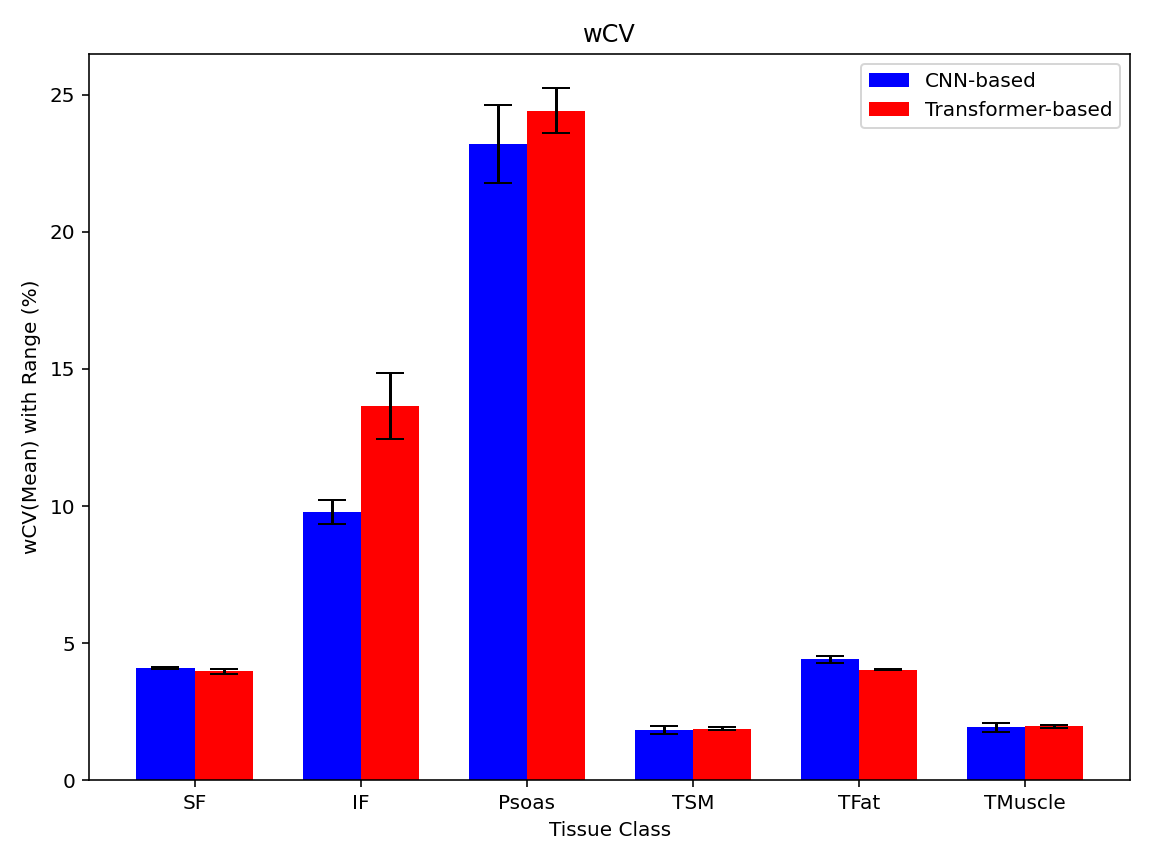

In [14]:
# ESMRMB : Added Total Fat and Total Muscle
from matplotlib.pyplot import *
%matplotlib notebook
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sfatdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='subcutfat')
ifatdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='intfat')
psoasdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='psoas')
tsmdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='muscle')

tfdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='TF')
tmdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='TM')

wCVsfat = sfatdf['wCV']
wCVifat = ifatdf['wCV']
wCVpsoas = psoasdf['wCV']
wCVtsm = tsmdf['wCV']

wCVtf = tfdf['wCV']
wCVtm = tmdf['wCV']

df1 = pd.DataFrame({ 'SF': sfatdf['wCV'][:15], 'IF': ifatdf['wCV'][:15], 'Psoas': psoasdf['wCV'][:15], 'TSM': tsmdf['wCV'][:15], 'TFat': tfdf['wCV'][:15], 'TMuscle': tmdf['wCV'][:15]})
df2 = pd.DataFrame({ 'SF': sfatdf['wCV'][-4:], 'IF': ifatdf['wCV'][-4:], 'Psoas': psoasdf['wCV'][-4:], 'TSM': tsmdf['wCV'][-4:], 'TFat': tfdf['wCV'][-4:], 'TMuscle': tmdf['wCV'][-4:]})
cols = list(df1.columns) 

means1 = df1.mean()
means2 = df2.mean()

mins1 = df1.min()
maxs1 = df1.max()

mins2 = df2.min()
maxs2 = df2.max()

error_bars1 = [(maxs1[col] - mins1[col])/2 for col in cols]
error_bars2 = [(maxs2[col] - mins2[col])/2 for col in cols]

index = range(len(cols))

plt.figure(figsize=(8,6))
bar_width = 0.35
plt.bar(index, means1, bar_width, label='CNN-based',  yerr=error_bars1, capsize=7, color ='blue')
plt.bar([i + bar_width for i in index], means2, bar_width, label='Transformer-based',  yerr=error_bars2, capsize=7, color ='red')
plt.xlabel('Tissue Class')
plt.ylabel('wCV(Mean) with Range (%)')
plt.title('wCV')
plt.xticks([i + bar_width/2 for i in index], cols)
plt.legend()
plt.tight_layout()
# plt.savefig("/Users/bthomas/Downloads/data_for_Belvin/midl24/ESMRMBfig2.pdf")
plt.show()



/var/folders/dv/mzhhstrd1q38jb0ls0t3yvl11m12l7/T/ipykernel_34852/1457353809.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


<IPython.core.display.Javascript object>


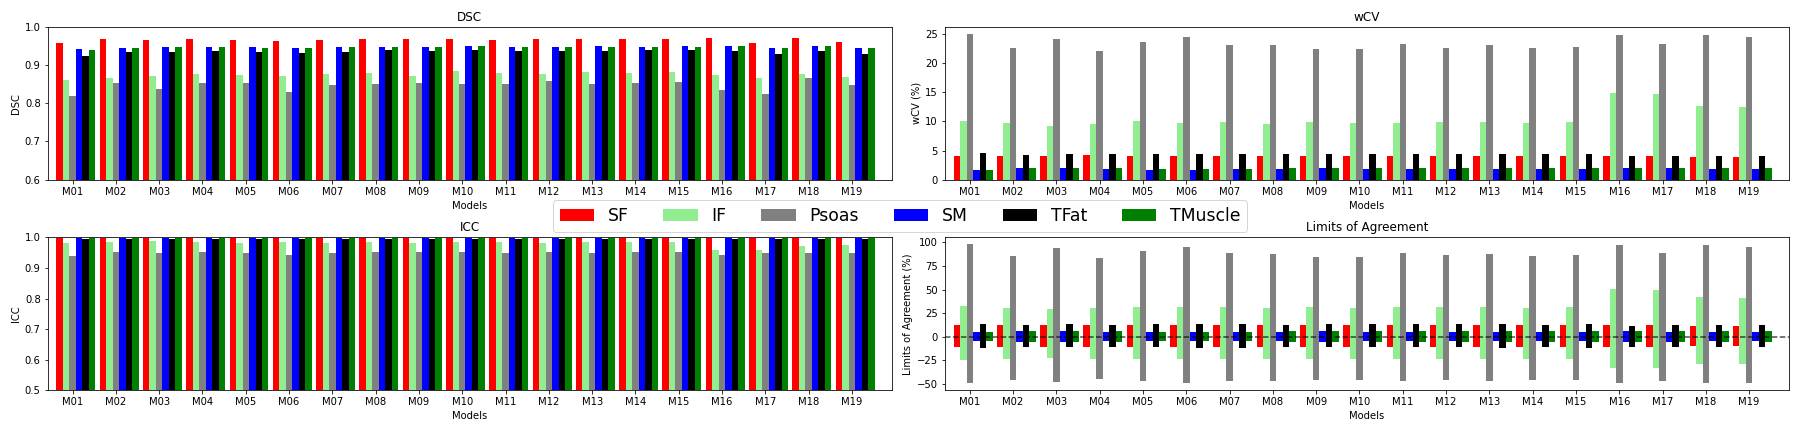

In [17]:

# ESMRMB : Added Total Fat and Total Muscle

import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib notebook
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

import numpy as np
import ast
import pandas as pd

df1 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='subcutfat')
df2 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='intfat')
df3 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='psoas')
df4 = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='muscle')

tfdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='TF')
tmdf = pd.read_excel('/Users/bthomas/Downloads/data_for_Belvin/midl24/shortESMRMBtable_49patients.xlsx',sheet_name='TM')

dsc1 = df1['DSC']
dsc2 = df2['DSC']
dsc3 = df3['DSC']
dsc4 = df4['DSC']
dsc5 = tfdf['DSC']
dsc6 = tmdf['DSC']

x = np.arange(len(dsc1))

bar_width = 0.15

fig, axs = plt.subplots(2,2, figsize=(25,6))
# fig1, ax1 = plt.subplots(figsize=(10, 6))


axs[0, 0].bar(x - 1.5 * bar_width, dsc1, bar_width, color='red')
axs[0, 0].bar(x - 0.5 * bar_width, dsc2, bar_width, color='lightgreen')
axs[0, 0].bar(x + 0.5 * bar_width, dsc3, bar_width, color='gray')
axs[0, 0].bar(x + 1.5 * bar_width, dsc4, bar_width, color='blue')
axs[0, 0].bar(x + 2.5 * bar_width, dsc5, bar_width, color='black')
axs[0, 0].bar(x + 3.5 * bar_width, dsc6, bar_width, color='green')

axs[0, 0].set_xlabel('Models')
axs[0, 0].set_ylabel('DSC')
axs[0, 0].set_title('DSC')
# axs[0, 0].legend()

# Add space between groups
axs[0, 0].set_xlim(-0.5, len(dsc1))
axs[0, 0].set_xticks(x + 0.5 * bar_width * 1)
axs[0, 0].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
axs[0, 0].set_ylim([0.6, 1])



ICC1 = df1['ICC']
ICC2 = df2['ICC']
ICC3 = df3['ICC']
ICC4 = df4['ICC']
ICC5 = tfdf['ICC']
ICC6 = tmdf['ICC']

axs[1,0].bar(x - 1.5 * bar_width, ICC1, bar_width, color='red')
axs[1,0].bar(x - 0.5 * bar_width, ICC2, bar_width, color='lightgreen')
axs[1,0].bar(x + 0.5 * bar_width, ICC3, bar_width, color='gray')
axs[1,0].bar(x + 1.5 * bar_width, ICC4, bar_width, color='blue')
axs[1,0].bar(x + 2.5 * bar_width, ICC5, bar_width, color='black')
axs[1,0].bar(x + 3.5 * bar_width, ICC6, bar_width, color='green')

axs[1,0].set_xlabel('Models')
axs[1,0].set_ylabel('ICC')
axs[1,0].set_title('ICC')
# axs[0, 1].legend()


axs[1,0].set_xlim(-0.5, len(ICC1))
axs[1,0].set_xticks(x + 0.5 * bar_width * 1)
axs[1,0].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
axs[1,0].set_ylim([0.5,1])



wCV1 = df1['wCV']
wCV2 = df2['wCV']
wCV3 = df3['wCV']
wCV4 = df4['wCV']
wCV5 = tfdf['wCV']
wCV6 = tmdf['wCV']


axs[0, 1].bar(x - 1.5 * bar_width, wCV1, bar_width, color='red')
axs[0, 1].bar(x - 0.5 * bar_width, wCV2, bar_width, color='lightgreen')
axs[0, 1].bar(x + 0.5 * bar_width, wCV3, bar_width, color='gray')
axs[0, 1].bar(x + 1.5 * bar_width, wCV4, bar_width, color='blue')
axs[0, 1].bar(x + 2.5 * bar_width, wCV5, bar_width, color='black')
axs[0, 1].bar(x + 3.5 * bar_width, wCV6, bar_width, color='green')

axs[0, 1].set_xlabel('Models')
axs[0, 1].set_ylabel('wCV (%)')
axs[0, 1].set_title('wCV')


axs[0, 1].set_xlim(-0.5, len(wCV1))
axs[0, 1].set_xticks(x + 0.5 * bar_width * 1)
axs[0, 1].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])




loa1 = list(df1['LoA'])
loa2 = list(df2['LoA'])
loa3 = list(df3['LoA'])
loa4 = list(df4['LoA'])
loa5 = list(tfdf['LoA'])
loa6 = list(tmdf['LoA'])

def convertLOA(data):
    listpos = []
    listneg = []
    for row in data:
        numbers = ast.literal_eval(row)
        for number in numbers:
            if number > 0:
                listpos.append(number)
            else:
                listneg.append(number)
        
    return listpos,listneg

list1_pos,list1_neg = convertLOA(loa1)
list2_pos,list2_neg = convertLOA(loa2)
list3_pos,list3_neg = convertLOA(loa3)
list4_pos,list4_neg = convertLOA(loa4)
list5_pos,list5_neg = convertLOA(loa5)
list6_pos,list6_neg = convertLOA(loa6)


# Plot positive values as bars (to the top of the hor axis)

axs[1, 1].bar(x - 1.5 * bar_width, list1_pos, bar_width, label='SF', color='red')
axs[1, 1].bar(x - 0.5 * bar_width, list2_pos, bar_width, label='IF', color='lightgreen')
axs[1, 1].bar(x + 0.5 * bar_width, list3_pos, bar_width, label='Psoas', color='gray')
axs[1, 1].bar(x + 1.5 * bar_width, list4_pos, bar_width, label='SM', color='blue')
axs[1, 1].bar(x + 2.5 * bar_width, list5_pos, bar_width, label='TFat', color='black')
axs[1, 1].bar(x + 3.5 * bar_width, list6_pos, bar_width, label='TMuscle', color='green')


# Plot negative values as bars (to the bottom of the hor axis)
axs[1, 1].bar(x - 1.5 * bar_width, list1_neg, bar_width, color='red')
axs[1, 1].bar(x - 0.5 * bar_width, list2_neg, bar_width, color='lightgreen')
axs[1, 1].bar(x + 0.5 * bar_width, list3_neg, bar_width, color='gray')
axs[1, 1].bar(x + 1.5 * bar_width, list4_neg, bar_width, color='blue')
axs[1, 1].bar(x + 2.5 * bar_width, list5_neg, bar_width, color='black')
axs[1, 1].bar(x + 3.5 * bar_width, list6_neg, bar_width, color='green')

axs[1, 1].set_xlabel('Models')
axs[1, 1].set_ylabel('Limits of Agreement (%)')
axs[1, 1].set_title('Limits of Agreement')
# axs[1, 1].legend()
axs[1, 1].axhline(0, color='black', alpha=0.7,linestyle='--')

# Add space between groups
axs[1, 1].set_xlim(-0.5, len(list1_pos))
axs[1, 1].set_xticks(x + 0.5 * bar_width * 1)
axs[1, 1].set_xticklabels(['M01','M02','M03','M04','M05','M06','M07','M08','M09','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19'])
common_legend = fig.legend(loc='center', bbox_to_anchor=(0.5, 0.5, 0, 0), fontsize='xx-large',ncol=6)
# Adjust layout and save as PDF
plt.tight_layout()
# plt.savefig("/Users/bthomas/Downloads/data_for_Belvin/midl24/ESMRMB_combined_figures.pdf")

# Show the combined figure (optional)
plt.show()

